<a href="https://colab.research.google.com/github/himanshu1729ch/News-Sentiment-Analysis-with-Stock-Prices-Variations-Mass-Layoffs/blob/main/Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful Libraries

In [86]:
import requests
import json
import numpy as np
import pandas as pd
import nltk
import matplotlib
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from string import punctuation
import re
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

## Sentiment Analysis of daily NEWS

In [64]:
url = ('https://newsapi.org/v2/everything?'
       'apiKey=4e5ed59af7e04507a0f8f7afb8d1b1a1')


In [65]:
response = requests.get(url)


In [66]:
# function to take raw data from the API and process it into a list in order 
#to trnasform it into a pandas dataframe
def get_articles(file): 
    article_results = [] 
    for i in range(len(file)):
        article_dict = {}
        article_dict['title'] = file[i]['title']
        article_dict['author'] = file[i]['author']
        article_dict['source'] = file[i]['source']
        article_dict['description'] = file[i]['description']
        article_dict['content'] = file[i]['content']
        article_dict['pub_date'] = file[i]['publishedAt']
        article_dict['url'] = file[i]["url"]
        article_dict['photo_url'] = file[i]['urlToImage']
        article_results.append(article_dict)
    return article_results

In [ ]:
# Collecting the first 100 articles about Layoffs to check the API and the working of the function 
parameters_headlines = {
    'q': 'Layoffs',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': '4e5ed59af7e04507a0f8f7afb8d1b1a1',
    'language': 'en',
    'from' : '2022-10-21'    
}
# making the API call 
response_headline = requests.get(url, params = parameters_headlines)
response_json_headline = response_headline.json()
responses = response_json_headline['articles']
# transforming the data from JSON dictionary to a pandas data frame
news_articles_df = pd.DataFrame(get_articles(responses))
# printing the head to check the format and the working of the get_articles function
news_articles_df.head()

,title,author,source,description,content,pub_date,url,photo_url
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}",Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06T22:20:46Z,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,"{'id': 'engadget', 'name': 'Engadget'}",Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18T09:16:17Z,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,"{'id': 'engadget', 'name': 'Engadget'}",We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11T13:30:40Z,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}",Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05T22:09:30Z,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Roku will lay off 200 employees after warning ...,Will Shanklin,"{'id': 'engadget', 'name': 'Engadget'}",In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17T20:15:41Z,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...


In [ ]:
responses = list() # stores responses for various news sources
domains = ['wsj.com','aljazeera.com','bbc.co.uk','techcrunch.com', 'nytimes.com','bloomberg.com','businessinsider.com',
             'cbc.ca','cnbc.com','cnn.com','ew.com','espn.go.com','espncricinfo.com','foxnews.com', 'apnews.com',
             'news.nationalgeographic.com','nymag.com','reuters.com','rte.ie','thehindu.com','huffingtonpost.com',
             'irishtimes.com','timesofindia.indiatimes.com','washingtonpost.com','time.com','medicalnewstoday.com',
             'ndtv.com','theguardian.com','dailymail.co.uk','firstpost.com','thejournal.ie', 'hindustantimes.com',
             'economist.com','news.vice.com','usatoday.com','telegraph.co.uk','metro.co.uk','mirror.co.uk','news.google.com']
for domain in domains:
    parameters_headlines = {
    'q': 'Layoffs',
    'domains':format(domain),
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': '4e5ed59af7e04507a0f8f7afb8d1b1a1',
    'language': 'en',
    'from' : '2022-10-21'    
    }
    rr = requests.get(url, params = parameters_headlines)
    data = rr.json()
    responses = data["articles"]
    news_articles_df=news_articles_df.append(pd.DataFrame(get_articles(responses)))

In [ ]:
rr

<Response [200]>

In [ ]:
data

{'status': 'ok', 'totalResults': 0, 'articles': []}

In [ ]:
print(news_articles_df.shape)
news_articles_df.head(15)

(3981, 8)


,title,author,source,description,content,pub_date,url,photo_url
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}",Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06T22:20:46Z,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,"{'id': 'engadget', 'name': 'Engadget'}",Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18T09:16:17Z,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,"{'id': 'engadget', 'name': 'Engadget'}",We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11T13:30:40Z,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,"{'id': 'engadget', 'name': 'Engadget'}",Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05T22:09:30Z,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...
4,Roku will lay off 200 employees after warning ...,Will Shanklin,"{'id': 'engadget', 'name': 'Engadget'}",In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17T20:15:41Z,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...
5,Twitter hit with mass resignations after Elon ...,Karissa Bell,"{'id': 'engadget', 'name': 'Engadget'}",Elon Musk is now facing a new crisis at Twitte...,Elon Musk is now facing a new crisis at Twitte...,2022-11-18T00:43:04Z,https://www.engadget.com/twitter-hit-with-mass...,https://s.yimg.com/os/creatr-uploaded-images/2...
6,The Morning After: Senator tells Elon Musk: ‘F...,Mat Smith,"{'id': 'engadget', 'name': 'Engadget'}",Senator Ed Markey of Massachusetts chastised E...,Senator Ed Markey of Massachusetts chastised E...,2022-11-14T12:15:56Z,https://www.engadget.com/the-morning-after-sen...,https://s.yimg.com/os/creatr-uploaded-images/2...
7,Elon Musk considers making verification a Twit...,Steve Dent,"{'id': 'engadget', 'name': 'Engadget'}","With Elon Musk in charge, Twitter is planning ...","With Elon Musk in charge, Twitter is planning ...",2022-10-31T05:19:06Z,https://www.engadget.com/elon-musk-considers-m...,https://s.yimg.com/os/creatr-uploaded-images/2...
8,Elon Musk reportedly tells Twitter he won’t la...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Elon Musk has tweeted a video clip of him ente...,Elon Musk has tweeted a video clip of him ente...,2022-10-27T12:29:48Z,https://www.engadget.com/elon-musk-twitter-won...,https://s.yimg.com/os/creatr-uploaded-images/2...
9,Elon Musk gives employees two days to commit t...,Mariella Moon,"{'id': 'engadget', 'name': 'Engadget'}",Twitter might lose even more employees followi...,Twitter might lose even more employees followi...,2022-11-16T11:15:06Z,https://www.engadget.com/elon-musk-hardcore-tw...,https://s.yimg.com/os/creatr-uploaded-images/2...


In [ ]:
# function to exatract just the name of the source of the news article and exclude other details
def source_getter(df):
    source = []
    for source_dict in df['source']:
        source.append(source_dict['name'])
    df['source'] = source #append the source to the df

In [ ]:
# this fuincton extracts the source name from the source dictionary as seen above
source_getter(news_articles_df)

In [ ]:
# converted the publication date to date time format for future analysis
news_articles_df['pub_date'] = pd.to_datetime(news_articles_df['pub_date']).apply(lambda x: x.date())

In [ ]:
#look for missing data
news_articles_df.isnull().sum() 

title            1
author         514
source           0
description      4
content          0
pub_date         0
url              0
photo_url       20
dtype: int64

In [ ]:
# imputing the author null column values with 'Anonymous'

In [ ]:
news_articles_df['author'].replace([np.nan], 'Anonymous', inplace=True)

In [ ]:
news_articles_df.isnull().sum()

title           1
author          0
source          0
description     4
content         0
pub_date        0
url             0
photo_url      20
dtype: int64

In [ ]:
# droping the rows with missing data 
news_articles_df.dropna(inplace=True)
news_articles_df = news_articles_df[~news_articles_df['description'].isnull()]
# summarize the number of rows and columns in the dataset
print(news_articles_df.isnull().sum())
print(news_articles_df.shape)

title          0
author         0
source         0
description    0
content        0
pub_date       0
url            0
photo_url      0
dtype: int64
(3956, 8)


In [ ]:
# combine the title and the content to get one dataframe column
news_articles_df['combined_text'] = news_articles_df['title'].map(str) +" "+ news_articles_df['content'].map(str) 

In [ ]:
news_articles_df.head(15)

,title,author,source,description,content,pub_date,url,photo_url,combined_text
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,Engadget,Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...,Meta will reportedly announce ‘large-scale’ la...
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,Engadget,Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...,Amazon CEO Andy Jassy confirms job 'eliminatio...
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,Engadget,We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...,"Engadget Podcast: A foldable iPhone, Meta layo..."
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,Engadget,Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,Former Twitter CEO Jack Dorsey says company-wi...
4,Roku will lay off 200 employees after warning ...,Will Shanklin,Engadget,In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...,Roku will lay off 200 employees after warning ...
5,Twitter hit with mass resignations after Elon ...,Karissa Bell,Engadget,Elon Musk is now facing a new crisis at Twitte...,Elon Musk is now facing a new crisis at Twitte...,2022-11-18,https://www.engadget.com/twitter-hit-with-mass...,https://s.yimg.com/os/creatr-uploaded-images/2...,Twitter hit with mass resignations after Elon ...
6,The Morning After: Senator tells Elon Musk: ‘F...,Mat Smith,Engadget,Senator Ed Markey of Massachusetts chastised E...,Senator Ed Markey of Massachusetts chastised E...,2022-11-14,https://www.engadget.com/the-morning-after-sen...,https://s.yimg.com/os/creatr-uploaded-images/2...,The Morning After: Senator tells Elon Musk: ‘F...
7,Elon Musk considers making verification a Twit...,Steve Dent,Engadget,"With Elon Musk in charge, Twitter is planning ...","With Elon Musk in charge, Twitter is planning ...",2022-10-31,https://www.engadget.com/elon-musk-considers-m...,https://s.yimg.com/os/creatr-uploaded-images/2...,Elon Musk considers making verification a Twit...
8,Elon Musk reportedly tells Twitter he won’t la...,Mariella Moon,Engadget,Elon Musk has tweeted a video clip of him ente...,Elon Musk has tweeted a video clip of him ente...,2022-10-27,https://www.engadget.com/elon-musk-twitter-won...,https://s.yimg.com/os/creatr-uploaded-images/2...,Elon Musk reportedly tells Twitter he won’t la...
9,Elon Musk gives employees two days to commit t...,Mariella Moon,Engadget,Twitter might lose even more employees followi...,Twitter might lose even more employees followi...,2022-11-16,https://www.engadget.com/elon-musk-hardcore-tw...,https://s.yimg.com/os/creatr-uploaded-images/2...,Elon Musk gives employees two days to commit t...


In [ ]:
print(news_articles_df['source'].unique())

['Engadget' 'Wired' 'The Verge' 'Gizmodo.com' 'CNN' 'BBC News'
 'Ars Technica' 'Reuters' 'Android Central' 'The Wall Street Journal'
 'Al Jazeera English' 'TechCrunch' 'Bloomberg' 'Business Insider' 'CNBC'
 'Entertainment Weekly' 'ESPN Cric Info' 'Fox News' 'Associated Press'
 'New York Magazine' 'The Irish Times' 'The Washington Post' 'Time'
 'Medical News Today' 'NDTV News' 'The Guardian' 'Daily Mail' 'Firstpost'
 'TheJournal.ie' 'Hindustan Times' 'The Economist' 'USA Today'
 'Telegraph.co.uk' 'Metro.co.uk' 'Mirror Online']


### Applying Text Preprocessing steps: 
In the followting sections, the text preprocessing steps were applied to the data.
1. Tokenization
2. Removing the non ASCII characters from the text
3. Stop words removal
4. Removing punctuations, apostrophe, special characters etc.
5. Lemmatize the text

In [88]:
# Function to remove non-ascii characters from the text
def _removeNonAscii(s): 
    return "".join(i for i in s if ord(i)<128)
# function to remove the punctuations, apostrophe, special characters using regular expressions
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = text.replace('(ap)', '')
    text = re.sub(r"\'s", " is ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r'\W+', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r"\\", "", text)
    text = re.sub(r"\'", "", text)    
    text = re.sub(r"\"", "", text)
    text = re.sub('[^a-zA-Z ?!]+', '', text)
    text = _removeNonAscii(text)
    text = text.strip()
    return text
# stop words are the words that convery little to no information about the actual content like the words:the, of, for etc
def remove_stopwords(word_tokens):
    filtered_sentence = [] 
    stop_words = stopwords.words('english')
    specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
    stop_words.extend(specific_words_list )
    for w in word_tokens: 
        if w not in stop_words: 
            filtered_sentence.append(w) 
    return filtered_sentence
# function for lemmatization 
def lemmatize(x):
    lemmatizer = WordNetLemmatizer()
    return' '.join([lemmatizer.lemmatize(word) for word in x])

In [87]:
# splitting a string, text into a list of tokens
tokenizer = RegexpTokenizer(r'\w+')
def tokenize(x): 
    return tokenizer.tokenize(x)

In [ ]:
# applying all of these functions to the our dataframe 
news_articles_df['combined_text'] = news_articles_df['combined_text'].map(clean_text)
news_articles_df['tokens'] = news_articles_df['combined_text'].map(tokenize)
news_articles_df['tokens'] = news_articles_df['tokens'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['tokens'].map(lemmatize)

In [ ]:
news_articles_df.head(15)

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,Engadget,Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...,meta will reportedly announce large scale layo...,"[meta, reportedly, announce, large, scale, lay...",meta reportedly announce large scale layoff ne...
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,Engadget,Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...,amazon ceo andy jassy confirms job elimination...,"[amazon, ceo, andy, jassy, confirms, job, elim...",amazon ceo andy jassy confirms job elimination...
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,Engadget,We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...,engadget podcast a foldable iphone meta layoff...,"[engadget, podcast, foldable, iphone, meta, la...",engadget podcast foldable iphone meta layoff f...
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,Engadget,Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,former twitter ceo jack dorsey says company wi...,"[former, twitter, ceo, jack, dorsey, says, com...",former twitter ceo jack dorsey say company wid...
4,Roku will lay off 200 employees after warning ...,Will Shanklin,Engadget,In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...,roku will lay off employees after warning of w...,"[roku, lay, employees, warning, weak, q, resul...",roku lay employee warning weak q result latest...
5,Twitter hit with mass resignations after Elon ...,Karissa Bell,Engadget,Elon Musk is now facing a new crisis at Twitte...,Elon Musk is now facing a new crisis at Twitte...,2022-11-18,https://www.engadget.com/twitter-hit-with-mass...,https://s.yimg.com/os/creatr-uploaded-images/2...,twitter hit with mass resignations after elon ...,"[twitter, hit, mass, resignations, elon, musk,...",twitter hit mass resignation elon musk hardcor...
6,The Morning After: Senator tells Elon Musk: ‘F...,Mat Smith,Engadget,Senator Ed Markey of Massachusetts chastised E...,Senator Ed Markey of Massachusetts chastised E...,2022-11-14,https://www.engadget.com/the-morning-after-sen...,https://s.yimg.com/os/creatr-uploaded-images/2...,the morning after senator tells elon musk fix ...,"[morning, senator, tells, elon, musk, fix, com...",morning senator tell elon musk fix company sen...
7,Elon Musk considers making verification a Twit...,Steve Dent,Engadget,"With Elon Musk in charge, Twitter is planning ...","With Elon Musk in charge, Twitter is planning ...",2022-10-31,https://www.engadget.com/elon-musk-considers-m...,https://s.yimg.com/os/creatr-uploaded-images/2...,elon musk considers making verification a twit...,"[elon, musk, considers, making, verification, ...",elon musk considers making verification twitte...
8,Elon Musk reportedly tells Twitter he won’t la...,Mariella Moon,Engadget,Elon Musk has tweeted a video clip of him ente...,Elon Musk has tweeted a video clip of him ente...,2022-10-27,https://www.engadget.com/elon-musk-twitter-won...,https://s.yimg.com/os/creatr-uploaded-images/2...,elon musk reportedly tells twitter he won t la...,"[elon, musk, reportedly, tells, twitter, layof...",elon musk reporte

In [89]:
pip install rake-nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [90]:
from rake_nltk import Rake 
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# finding the keywords using the rake algorithm from NLTK
# rake is Rapid Automatic Keyword Extraction algorithm, and is used for domain independent keyword extraction
news_articles_df['keywords'] = ""
for index,row in news_articles_df.iterrows():
    comb_text = row['combined_text']
    r = Rake()
    r.extract_keywords_from_text(comb_text)
    key_words_dict = r.get_word_degrees()
    row['keywords'] = list(key_words_dict.keys())

In [ ]:
# applying the fucntion to the dataframe
news_articles_df['keywords'] = news_articles_df['keywords'].map(remove_stopwords)
news_articles_df['lems'] =news_articles_df['keywords'].map(lemmatize)

In [ ]:
news_articles_df.head(5)
news_articles_df.to_csv('news_articles_clean.csv', index = False)

In [ ]:
print(news_articles_df.shape)
print(news_articles_df.isnull().sum())

(3956, 12)
title            0
author           0
source           0
description      0
content          0
pub_date         0
url              0
photo_url        0
combined_text    0
tokens           0
lems             0
keywords         0
dtype: int64


In [ ]:
news_articles_df=pd.read_csv('news_articles_clean.csv')

In [ ]:
news_articles_df.head(5)

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,keywords
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,Engadget,Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...,meta will reportedly announce large scale layo...,"['meta', 'reportedly', 'announce', 'large', 's...",meta reportedly announce large scale layoff ne...,"['meta', 'reportedly', 'announce', 'large', 's..."
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,Engadget,Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...,amazon ceo andy jassy confirms job elimination...,"['amazon', 'ceo', 'andy', 'jassy', 'confirms',...",amazon ceo andy jassy confirms job elimination...,"['amazon', 'ceo', 'andy', 'jassy', 'confirms',..."
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,Engadget,We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...,engadget podcast a foldable iphone meta layoff...,"['engadget', 'podcast', 'foldable', 'iphone', ...",engadget podcast foldable iphone meta layoff f...,"['engadget', 'podcast', 'foldable', 'iphone', ..."
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,Engadget,Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,former twitter ceo jack dorsey says company wi...,"['former', 'twitter', 'ceo', 'jack', 'dorsey',...",former twitter ceo jack dorsey say company wid...,"['former', 'twitter', 'ceo', 'jack', 'dorsey',..."
4,Roku will lay off 200 employees after warning ...,Will Shanklin,Engadget,In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...,roku will lay off employees after warning of w...,"['roku', 'lay', 'employees', 'warning', 'weak'...",roku lay employee warning weak q result latest...,"['roku', 'lay', 'employees', 'warning', 'weak'..."


In [ ]:
news_articles_df.head(5)

,title,author,source,description,content,pub_date,url,photo_url,combined_text,tokens,lems,keywords
0,Meta will reportedly announce ‘large-scale’ la...,Igor Bonifacic,Engadget,Facebook parent company Meta could announce la...,Facebook parent company Meta could announce la...,2022-11-06,https://www.engadget.com/meta-reportedly-plans...,https://s.yimg.com/os/creatr-uploaded-images/2...,meta will reportedly announce large scale layo...,"[meta, reportedly, announce, large, scale, lay...",meta reportedly announce large scale layoff ne...,"[meta, reportedly, announce, large, scale, lay..."
1,Amazon CEO Andy Jassy confirms job 'eliminatio...,Steve Dent,Engadget,Amazon's layoffs announced on Wednesday will c...,Amazon's layoffs announced on Wednesday will c...,2022-11-18,https://www.engadget.com/amazon-ceo-andy-jassy...,https://s.yimg.com/os/creatr-uploaded-images/2...,amazon ceo andy jassy confirms job elimination...,"[amazon, ceo, andy, jassy, confirms, job, elim...",amazon ceo andy jassy confirms job elimination...,"[amazon, ceo, andy, jassy, confirms, job, elim..."
2,"Engadget Podcast: A foldable iPhone, Meta layo...",Devindra Hardawar,Engadget,We’re still waiting for Apple to deliver a gen...,Were still waiting for Apple to deliver a genu...,2022-11-11,https://www.engadget.com/engadget-podcast-fold...,https://s.yimg.com/os/creatr-uploaded-images/2...,engadget podcast a foldable iphone meta layoff...,"[engadget, podcast, foldable, iphone, meta, la...",engadget podcast foldable iphone meta layoff f...,"[engadget, podcast, foldable, iphone, meta, la..."
3,Former Twitter CEO Jack Dorsey says company-wi...,Igor Bonifacic,Engadget,Jack Dorsey says he can “understand” if curren...,Jack Dorsey says he can understand if current ...,2022-11-05,https://www.engadget.com/jack-dorsey-twitter-a...,https://s.yimg.com/os/creatr-uploaded-images/2...,former twitter ceo jack dorsey says company wi...,"[former, twitter, ceo, jack, dorsey, says, com...",former twitter ceo jack dorsey say company wid...,"[former, twitter, ceo, jack, dorsey, says, com..."
4,Roku will lay off 200 employees after warning ...,Will Shanklin,Engadget,In the latest example of what seems like daily...,In the latest example of what seems like daily...,2022-11-17,https://www.engadget.com/roku-layoffs-streamin...,https://s.yimg.com/os/creatr-images/2019-08/01...,roku will lay off employees after warning of w...,"[roku, lay, employees, warning, weak, q, resul...",roku lay employee warning weak q result latest...,"[roku, lay, employees, warning, weak, q, resul..."


## Sentiment Analysis of News articles to answer our Questions-

In [92]:
nltk.download('vader_lexicon')
  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# calculating the polarity of the news articles 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sia = SIA()
results = []
for line in news_articles_df['lems'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

In [ ]:
# Creating a new dataframe of only the polarity score, the headline and the source of the news 
headlines_polarity = pd.DataFrame.from_records(results)
temp = []
for line in news_articles_df['source'] :
    temp.append(line)
headlines_polarity['source'] =temp

In [ ]:
# categorize news as positive or negative based on the compound score obtained
headlines_polarity['label'] = 0
# I have considered the news as positive if the compound score is greater than 0.2 hence the label 1
headlines_polarity.loc[headlines_polarity['compound'] > 0.2, 'label'] = 1
# if the compound score is below 0.2 then it is considered negative 
headlines_polarity.loc[headlines_polarity['compound'] < -0.2, 'label'] = -1
# word count of news headlines is calculated
headlines_polarity['word_count'] = headlines_polarity['headline'].apply(lambda x: len(str(x).split()))

In [ ]:
headlines_polarity.head(10)

,neg,neu,pos,compound,headline,source,label,word_count
0,0.080,0.920,0.000,-0.2732,meta reportedly announce large scale layoff ne...,Engadget,-1,25
1,0.000,0.928,0.072,0.1779,amazon ceo andy jassy confirms job elimination...,Engadget,0,23
2,0.000,0.927,0.073,0.2235,engadget podcast foldable iphone meta layoff f...,Engadget,1,25
3,0.203,0.797,0.000,-0.6249,former twitter ceo jack dorsey say company wid...,Engadget,-1,22
4,0.225,0.699,0.076,-0.5994,roku lay employee warning weak q result latest...,Engadget,-1,28
5,0.368,0.632,0.000,-0.8588,twitter hit mass resignation elon musk hardcor...,Engadget,-1,22
6,0.127,0.873,0.000,-0.4939,morning senator tell elon musk fix company ed ...,Engadget,-1,23
7,0.000,0.852,0.148,0.4588,elon musk considers making verification twitte...,Engadget,1,25
8,0.000,1.000,0.000,0.0000,elon musk reportedly tell twitter layoff perce...,Engadget,0,26
9,0.183,0.754,0.064,-0.6249,elon musk give employee two day commit hardcor...,Engadget,-1,29


In [ ]:
#headlines_polarity.label.value_counts()
#headlines_polarity.groupby('source').label.value_counts()
# Grouping the news articles by their source and calculating their mean polarity  
gk = headlines_polarity.groupby(['source', 'label']) 
fk= headlines_polarity.groupby('source')['compound'].mean()
fk = fk.to_frame()
fk.to_csv('mean_polarity.csv', index = 'source')

### Visualizations

In [93]:
pip install chart-studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 2.6 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11448 sha256=b520ef857335e673260f4fdf5fad7fa09a96bd5bfa54882468edeb2e5b22ed28
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [95]:
from chart_studio import plotly

In [94]:
# libraries
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings 
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
pd.options.display.max_columns = 30
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
from wordcloud import WordCloud
from collections import Counter


In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 25.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


[Text(0, 0, 'Negative'), Text(0, 0, 'Neutral'), Text(0, 0, 'Positive')]

Text(0, 0.5, 'Percentage')

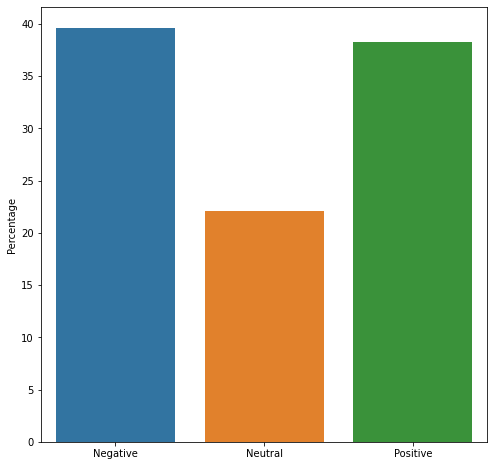

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
counts = headlines_polarity.label.value_counts(normalize=True) * 100
sns.barplot(x=counts.index, y=counts, ax=ax)
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")
plt.show()

Insights: It is clear from the above bar chart that the distribution of news is quite even when it comes to the polarity of the news. Both Positive and negative sentiment accounted for about 40% each despite the time frame in which the newss articles were collected. At the prima facie level, this goes on to show that the media outlets are not biased towards the negative news.

Insights: The graph above shows the univariate polarity distribution of the news article headlines and it can be seen that the polarity score of the headlines is quite equally distributed across the range of 1 to -1. We have equal number of records on both sides of 0. Thus now we can reach a conclusion that though we often feel that only the negative news make it to the headlines, that is certainly not the case. It is our brain that is susceptible to this negativity bias, wherein we forget the positive side of the story and focus only on the negative side of it.

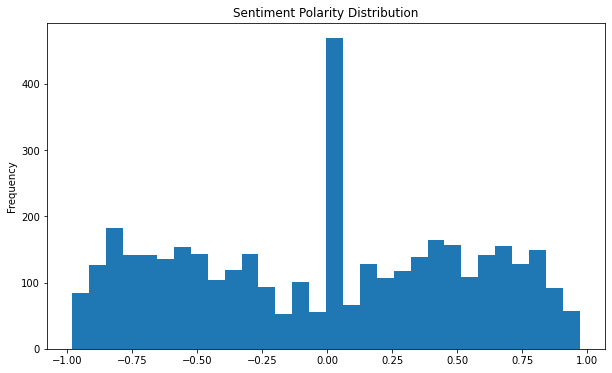

In [ ]:
headlines_polarity['compound'].plot(
    kind='hist',
    bins=30,
    title='Sentiment Polarity Distribution')

Text(0.5, 0, ' Mean Polarity')

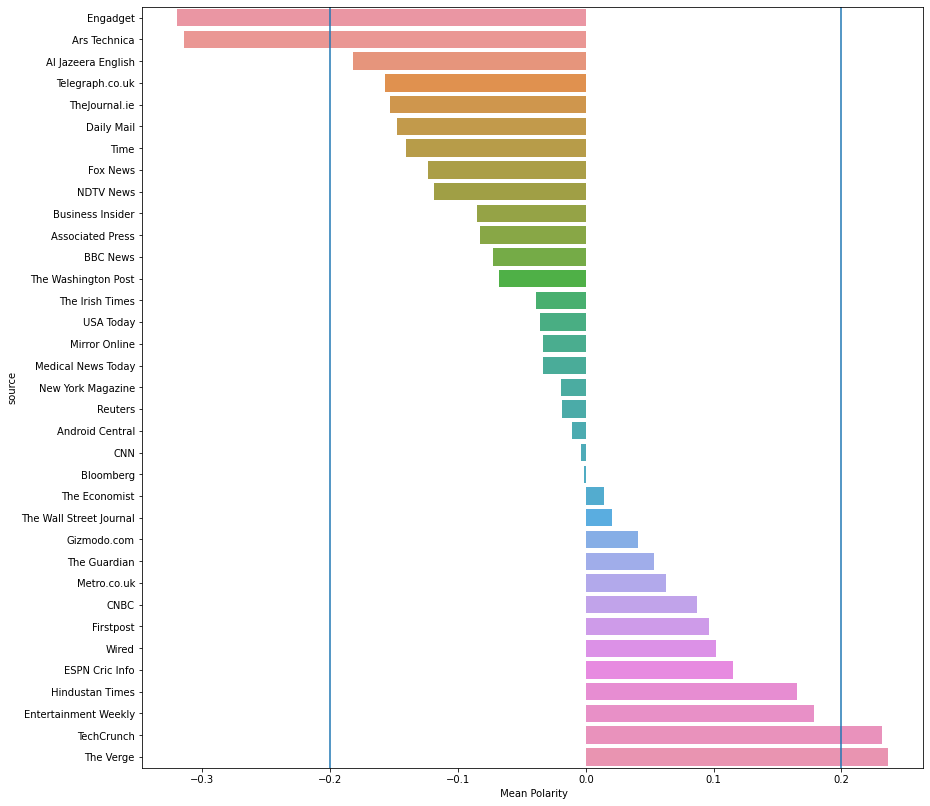

In [ ]:
# Checking out the distribution of the news polarity based on the source of news
df_polarity = pd.read_csv('mean_polarity.csv')
df_polarity = df_polarity.sort_values(['compound']).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(14, 14))
ax = sns.barplot(x='compound', y='source', data=df_polarity)
ax.set_xlabel(' Mean Polarity')
ax.axvline(0.2)
ax.axvline(-0.2)

In [ ]:
# Box Plot for the top news publishers
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['compound']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['compound']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['compound']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['compound']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'The Economist']['compound']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Wired']['compound']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'The Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Wired',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Sentiment Polarity Boxplot of Popular News publishers"
)
fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Sentiment Polarity Boxplot of Popular News publishers")
fig.show(renderer="colab")

In [ ]:
y0 = headlines_polarity.loc[headlines_polarity['source'] == 'Al Jazeera English']['word_count']
y1 = headlines_polarity.loc[headlines_polarity['source'] == 'BBC News']['word_count']
y2 = headlines_polarity.loc[headlines_polarity['source'] == 'The Wall Street Journal']['word_count']
y3 = headlines_polarity.loc[headlines_polarity['source'] == 'The Washington Post']['word_count']
y4 = headlines_polarity.loc[headlines_polarity['source'] == 'The Economist']['word_count']
y5 = headlines_polarity.loc[headlines_polarity['source'] == 'Wired']['word_count']

trace0 = go.Box(
    y=y0,
    name = 'Al Jazeera',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=y1,
    name = 'BBC',
    marker = dict(
        color = 'rgb(0, 150, 128)',
    )
)
trace2 = go.Box(
    y=y2,
    name = 'Wall Street Journal',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)
trace3 = go.Box(
    y=y3,
    name = 'Washington Post',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)
trace4 = go.Box(
    y=y4,
    name = 'The Economist',
    marker = dict(
        color = 'rgb(10, 0, 100)',
    )
)
trace5 = go.Box(
    y=y5,
    name = 'Wired',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)
data = [trace0, trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    title = "Headline Length Boxplot of Popular News publishers"
)

fig = go.Figure(data=data,layout=layout)
iplot(fig, filename = "Headline Length Boxplot of Popular News publishers")
fig.show(renderer="colab")

In [ ]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')
print(type(stop_words))
specific_words_list = ['char', 'u', 'hindustan', 'doj', 'washington'] 
#stop_words.extend(specific_words_list )
def process_text(headlines):
    tokens = []
    for line in headlines:
        line = line.lower()
        toks = tokenizer.tokenize(line)
        toks = [t for t in toks if t not in stop_words]
        tokens.extend(toks)  
    return tokens


<class 'list'>


## Word Frequency Distribution and Zipf's Law
Zipf law: Zipf's law states that given a large sample of words used, the frequency of any word is inversely proportional to its rank in the frequency table. So word number n has a frequency proportional to 1/n. Thus the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, etc. For example, in one sample of words in the English language, the most frequently occurring word, 'the', accounts for nearly 7% of all the words (69,971 out of slightly over 1 million). True to Zipf's Law, the second-place word 'of' accounts for slightly over 3.5% of words (36,411 occurrences). (source: wikipedia)

So essentially what the law actually states is that:

The most appearing word in a corpus suppose has frequency f
The second most appearing word would have frequency roughly f/2
Then the third most appearing word would have frequency roughly f/3
Then the fourth most appearing word would have frequency roughly f/4
and so on.

What is astonishing is that this law holds true for almost all large natural language corpuses.For eg : Books, ancient scripts, even temperature trends over past years etc.

I decided upon coming across Zipf’s Law that I will investigate if the mysterious Zipf's law holds true for a news corpus collected from not one but as many as 39 different sources of news article.

In [ ]:
# Positive headlines and its distribution 
pos_lines = list(headlines_polarity[headlines_polarity.label == 1].headline)
# extract the headlines that had label =1 which meant it had a positive overall sentiment
pos_tokens =process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

# Now negative headlines
neg_lines = list(headlines_polarity[headlines_polarity.label == -1].headline)
# extract the headlines that had label-1 which meant it had a negative overall sentiment
neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Positive)')

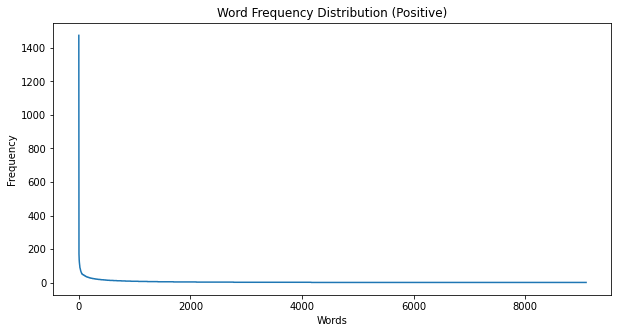

In [ ]:
# plotting the word distribution for positive headlines
y_val = [x[1] for x in pos_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

Text(0.5, 0, 'Words')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Word Frequency Distribution (Negative)')

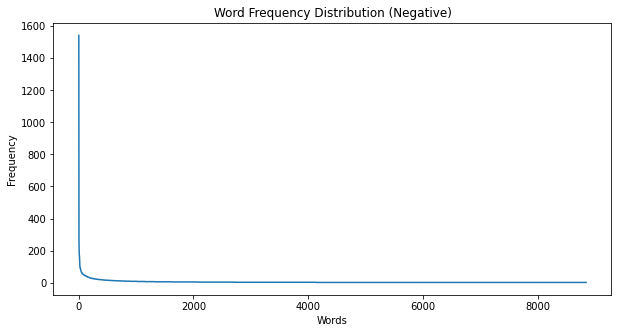

In [ ]:
# Plotting the word frequency distribution for negative headlines
y_val = [x[1] for x in neg_freq.most_common()]
fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

 It can be seen from the above two plots that the both the Positive sentiment words as well as the negative sentiment words follow the zipf's law. 
Now, how do we know whether it follows the zipfs's law? 
By observing the plot we see words close to zero have a very high word frequency and then it drops to an 'L' shaped curve, which is typical characteristic of a zipfian distribution. 
Furthermore, It can also be inferred that Zipf’s law follows the Pareto distribution where only first 20 % of words results into 80 % of frequency of entire corpus. It is important to mention that In all the results, there are some instances where the word frequency not always falls to 1/2 to its previous, which is fine because overall pattern approximates the nature.

### Wordcloud : To visualize the dominating words across news articles

<Figure size 1080x1080 with 0 Axes>

(-0.5, 1499.5, 1199.5, -0.5)

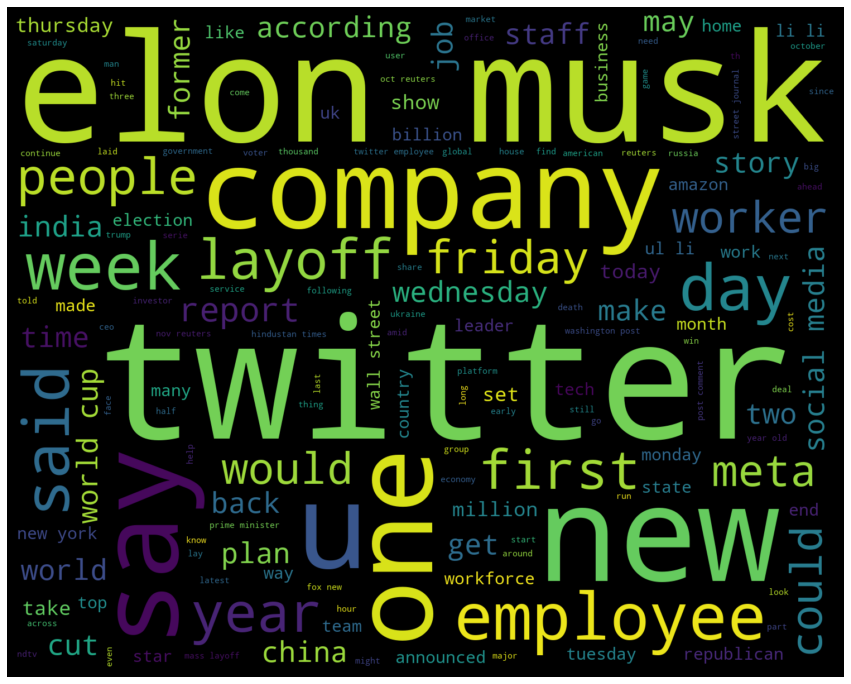

In [ ]:
data=news_articles_df
stop = ["https", "co", "char","chars"] + list(stop_words)
wc = WordCloud(stopwords=stop, max_words=700, margin=10, background_color='black',
scale=3, relative_scaling = 0.4, width=500, height=400,
random_state=1).generate(' '.join(data['combined_text']))
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

The word cloud is a analysis technique wherein more commonly the term appears within the text being analysed, the larger the word appears in the image generated.

## Analyzing the distribution of Words and Biagram Analysis --

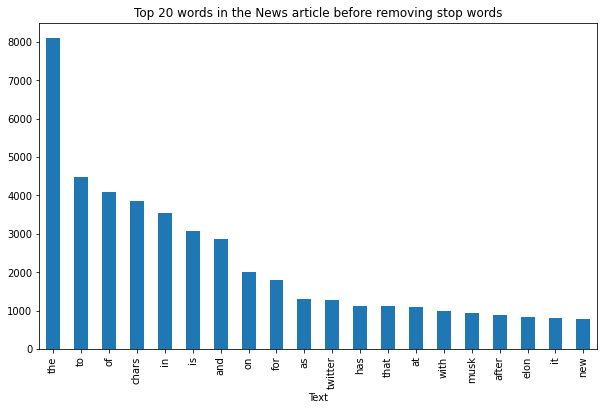

In [ ]:
# A genralized function to fetch the top n words from the corpus -
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(news_articles_df['combined_text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Text', 'count'])
df1.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in the News article before removing stop words')

In [ ]:
# news article specific stopwords were downloaded from:  https://github.com/vikasing/news-stopwords.git
# Then, I removed all the news specific stopwords  from my dataframe's column of token 
def remove_stopwords(params):
    with open('sw10k.csv','r') as my_stopwords:
        stopwords_list = my_stopwords.read()
        new_list = []
        for param in params:
            if str(param) not in stopwords_list:
                new_list.append(param)
            else:
                pass # You can write something to do if the stopword is found
    my_stopwords.close()
    return (new_list)
new_list = remove_stopwords(news_articles_df['tokens'])

In [ ]:
type(new_list)

list

In [ ]:
print(new_list)

["['meta', 'reportedly', 'announce', 'large', 'scale', 'layoffs', 'next', 'week', 'facebook', 'parent', 'company', 'meta', 'could', 'announce', 'large', 'scale', 'layoffs', 'early', 'next', 'week', 'according', 'wall', 'street', 'journal', 'outlet', 'reports', 'company', 'planning', 'cut', 'many', 'thousands', 'employ', 'chars']", "['amazon', 'ceo', 'andy', 'jassy', 'confirms', 'job', 'eliminations', 'continue', 'amazon', 'layoffs', 'announced', 'wednesday', 'continue', 'early', 'ceo', 'andy', 'jassy', 'said', 'letter', 'employees', 'posted', 'yesterday', 'said', 'company', 'hired', 'rapidly', 'last', 'years', 'chars']", "['engadget', 'podcast', 'foldable', 'iphone', 'meta', 'layoffs', 'fall', 'ftx', 'still', 'waiting', 'apple', 'deliver', 'genuine', 'foldable', 'iphone', 'didnt', 'stop', 'group', 'engineers', 'china', 'crafting', 'prototype', 'week', 'cherlynn', 'devindra', 'dive', 'chars']", "['former', 'twitter', 'ceo', 'jack', 'dorsey', 'says', 'company', 'wide', 'layoffs', 'fault'

In [ ]:
from nltk import flatten
flattened_list = flatten(new_list)
print(flattened_list)

["['meta', 'reportedly', 'announce', 'large', 'scale', 'layoffs', 'next', 'week', 'facebook', 'parent', 'company', 'meta', 'could', 'announce', 'large', 'scale', 'layoffs', 'early', 'next', 'week', 'according', 'wall', 'street', 'journal', 'outlet', 'reports', 'company', 'planning', 'cut', 'many', 'thousands', 'employ', 'chars']", "['amazon', 'ceo', 'andy', 'jassy', 'confirms', 'job', 'eliminations', 'continue', 'amazon', 'layoffs', 'announced', 'wednesday', 'continue', 'early', 'ceo', 'andy', 'jassy', 'said', 'letter', 'employees', 'posted', 'yesterday', 'said', 'company', 'hired', 'rapidly', 'last', 'years', 'chars']", "['engadget', 'podcast', 'foldable', 'iphone', 'meta', 'layoffs', 'fall', 'ftx', 'still', 'waiting', 'apple', 'deliver', 'genuine', 'foldable', 'iphone', 'didnt', 'stop', 'group', 'engineers', 'china', 'crafting', 'prototype', 'week', 'cherlynn', 'devindra', 'dive', 'chars']", "['former', 'twitter', 'ceo', 'jack', 'dorsey', 'says', 'company', 'wide', 'layoffs', 'fault'

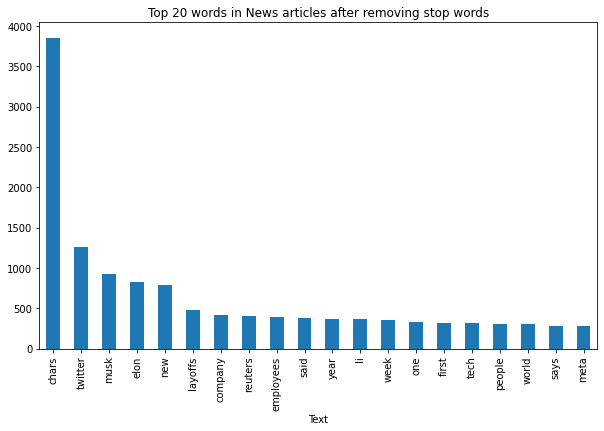

In [ ]:
common_words = get_top_n_words(flattened_list, 20)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in News articles after removing stop words')


### **Bigram Analysis**
Some English words occur together more frequently. For example - blue sky, do or die, best performance, heavy rain etc. So, in a text document. lets analyze which two words appeared most frequently in the news article corpus.




In [ ]:
# A genralized function to extact the top n most frequently occuring bigram from the text corpus 
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(flattened_list, 20)
for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in News Corpus after removing stop words')

elon musk 770
social media 157
world cup 143
new york 122
li li 120
wall street 118
ul li 113
comment story 110
fox news 103
oct reuters 100
mass layoffs 98
prime minister 95
nov reuters 92
twitter employees 91
year old 88
street journal 81
post comment 81
new owner 74
job cuts 71
rishi sunak 71


In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

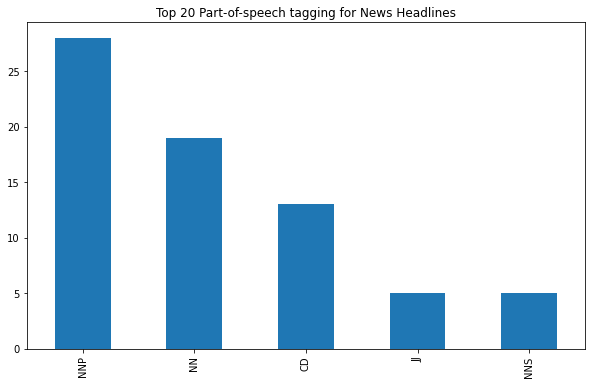

In [ ]:
# extracting the parts of speech from the news headlines using textBlob
blob = TextBlob(str(news_articles_df['title']))
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])
pos_df = pos_df.pos.value_counts()[:5]
pos_df.plot(
    kind='bar', 
    title='Top 20 Part-of-speech tagging for News Headlines')

1. NNP: Proper noun
2. NN : Noun 
3. CD : Cardinal digit
4. JJ : adjective
5. NNS: noun plural 

Source:GeeksforGeeks
Here’s a list of the tags, what they mean, and some examples:

CC coordinating conjunction
CD cardinal digit
DT determiner
EX existential there (like: “there is” … think of it like “there exists”)
FW foreign word
IN preposition/subordinating conjunction
JJ adjective ‘big’
JJR adjective, comparative ‘bigger’
JJS adjective, superlative ‘biggest’
LS list marker 1)
MD modal could, will
NN noun, singular ‘desk’
NNS noun plural ‘desks’
NNP proper noun, singular ‘Harrison’
NNPS proper noun, plural ‘Americans’
PDT predeterminer ‘all the kids’
POS possessive ending parent‘s
PRP personal pronoun I, he, she
PRP possessive pronoun my, his, hers
RB adverb very, silently,
RBR adverb, comparative better
RBS adverb, superlative best
RP particle give up
TO to go ‘to‘ the store.
UH interjection errrrrrrrm
VB verb, base form take
VBD verb, past tense took
VBG verb, gerund/present participle taking
VBN verb, past participle taken
VBP verb, sing. present, non-3d take
VBZ verb, 3rd person sing. present takes
WDT wh-determiner which
WP wh-pronoun who, what
WP possessive wh-pronoun whose
WRB wh-adverb where, when

## SECTION 2- Analyzing the share market

As News articles provides large volumes of real-time news and update, investors can potentially exploit that information by leveraging machine learning and natural language processing techniques. So do the sentiment associated with the financial news explain the volatile nature of stock market? Does the negative sentiments of the news articles for that perticular day have an impact on the closing rates of the stocks for that day? The following section attempts to analyze if there exists a correlation between the news sentiment and the closing price.

The stock market Data for this Analysis was fetched from Word trading data and the details can be found here: https://www.worldtradingdata.com/documentation#historical-market-data

In [105]:
import datetime as dt
import pandas as pd
import requests

HTTP GET Request Parameters:

In [106]:
url2='http://api.marketstack.com/v1/eod'

In [107]:
api_key2='a45f452f2cba0260ab7dda423a15f28c'

['AMZN','TWTR','META','MSFT','NFLX','Z','LYFT','COIN'

Choosing META as our company on radar as it have confirmed on 9th November to layoff its 11000 employees.
Nov 9, 2022 — Meta has confirmed a massive round of layoffs, amounting to 11000 employees or 13% of its total workforce.

In [108]:
parameters_headlines2 = {
    'symbols':'META',
    'access_key': api_key2,
    'language': 'en',
    'date_from' : '2022-10-21',
    'date_to': '2022-11-20'   
}
# making the API call 
response_headline = requests.get(url2, params = parameters_headlines2)
response_json_headline = response_headline.json()

In [109]:
response_json_headline

{'pagination': {'limit': 100, 'offset': 0, 'count': 21, 'total': 21},
 'data': [{'open': 113.8,
   'high': 114.32,
   'low': 110.62,
   'close': 112.05,
   'volume': 33340900.0,
   'adj_high': 114.32,
   'adj_low': 110.62,
   'adj_close': 112.05,
   'adj_open': 113.8,
   'adj_volume': 33357707.0,
   'split_factor': 1.0,
   'dividend': 0.0,
   'symbol': 'META',
   'exchange': 'ARCX',
   'date': '2022-11-18T00:00:00+0000'},
  {'open': 110.41,
   'high': 112.3272,
   'low': 109.8,
   'close': 111.45,
   'volume': 34995304.0,
   'adj_high': 112.33,
   'adj_low': 109.8,
   'adj_close': 111.45,
   'adj_open': 110.41,
   'adj_volume': 35093822.0,
   'split_factor': 1.0,
   'dividend': 0.0,
   'symbol': 'META',
   'exchange': 'ARCX',
   'date': '2022-11-17T00:00:00+0000'},
  {'open': 114.5,
   'high': 116.075,
   'low': 112.6612,
   'close': 113.23,
   'volume': 33287773.0,
   'adj_high': 116.075,
   'adj_low': 112.66,
   'adj_close': 113.23,
   'adj_open': 114.5,
   'adj_volume': 33287773.0,


In [110]:
# function to take raw data from the API and process it into a list inorder to trnasform it into a pandas dataframe
def get_imp(file): 
    stock_results = [] 
    for i in range(len(file)):
        stock_dict = {}
        stock_dict['open'] = file[i]['open']
        stock_dict['high'] = file[i]['high']
        stock_dict['low'] = file[i]['low']
        stock_dict['close'] = file[i]['close']
        stock_dict['date'] = file[i]['date']
        stock_results.append(stock_dict)
    return stock_results

In [111]:
responses = response_json_headline['data']
stocks_market_df = pd.DataFrame(get_imp(responses))

In [112]:
stocks_market_df.head()

,open,high,low,close,date
0,113.80,114.3200,110.6200,112.05,2022-11-18T00:00:00+0000
1,110.41,112.3272,109.8000,111.45,2022-11-17T00:00:00+0000
2,114.50,116.0750,112.6612,113.23,2022-11-16T00:00:00+0000
3,116.07,118.7400,114.4116,117.08,2022-11-15T00:00:00+0000
4,110.99,116.2700,110.8500,114.22,2022-11-14T00:00:00+0000


In [113]:
# converted the date to date time format for future analysis
stocks_market_df['date'] = pd.to_datetime(stocks_market_df['date']).apply(lambda x: x.date())

In [114]:
stocks_market_df.head()

,open,high,low,close,date
0,113.80,114.3200,110.6200,112.05,2022-11-18
1,110.41,112.3272,109.8000,111.45,2022-11-17
2,114.50,116.0750,112.6612,113.23,2022-11-16
3,116.07,118.7400,114.4116,117.08,2022-11-15
4,110.99,116.2700,110.8500,114.22,2022-11-14


In [115]:
stocks_market_df.to_csv('Meta.csv', index = False)

In [116]:
# collecting all the news Articles from the same period as the stock market prices
responses = list() 
parameters_headlines = {
    'domains': 'marketwatch.com',
    'sortBy':'popularity',
    'pageSize': 100,
    'apiKey': '4e5ed59af7e04507a0f8f7afb8d1b1a1',
    'language': 'en',
    'from' : '2022-10-22'    
    }
rr = requests.get(url, params = parameters_headlines)
data = rr.json()
responses = data['articles']
stock_articles=pd.DataFrame(get_articles(responses))
stock_articles.head()



,title,author,source,description,content,pub_date,url,photo_url
0,Earnings Results: KLA Corp. adds to list of be...,Wallace Witkowski,"{'id': None, 'name': 'MarketWatch'}",KLA Corp. rose in the extended session Wednesd...,KLA Corp. rose in the extended session Wednesd...,2022-10-26T20:30:00Z,https://www.marketwatch.com/story/kla-corp-add...,https://images.mktw.net/im-651608/social
1,Futures Movers: Oil aims for 3-day winning streak,William Watts,"{'id': None, 'name': 'MarketWatch'}",Oil was attempting to build on gains from the ...,"Oil futures ticked higher early Thursday, atte...",2022-10-27T11:01:00Z,https://www.marketwatch.com/story/oil-aims-for...,https://images.mktw.net/im-514789/social
2,ETF Wrap: Emerging-markets ETFs are ‘burning i...,Christine Idzelis,"{'id': None, 'name': 'MarketWatch'}",This week's ETF Wrap looks at how Chinese stoc...,Hello! This weeks ETF Wrap looks at how Chines...,2022-10-27T20:43:00Z,https://www.marketwatch.com/story/emerging-mar...,https://images.mktw.net/im-232918/social
3,Five Questions With: Adam Laxalt says he wants...,Victor Reklaitis,"{'id': None, 'name': 'MarketWatch'}",The remarks from the Republican Senate candida...,"Adam Laxalt, a Nevada Republican in a closely ...",2022-10-25T21:33:00Z,https://www.marketwatch.com/story/adam-laxalt-...,https://images.mktw.net/im-650600/social
4,The Margin: Vecna’s house on ‘Stranger Things’...,Nicole Lyn Pesce,"{'id': None, 'name': 'MarketWatch'}","The creepy 'Creel House' last sold for $350,00...",Stranger Things have happened to the real esta...,2022-11-02T18:58:00Z,https://www.marketwatch.com/story/vecnas-house...,https://images.mktw.net/im-657445/social


Converting the date column from both the dataframes into date time format

In [117]:
# stock news articles
stock_articles['date'] = pd.to_datetime(stock_articles['pub_date']).apply(lambda x: x.date())



 I wanted both the dataframes merged into one so that it is easy for plotting therfore I merged the two data frame on date column

In [118]:
df_merged=stocks_market_df.merge(stock_articles,on='date')


In [119]:
df_merged.head(10)

,open,high,low,close,date,title,author,source,description,content,pub_date,url,photo_url
0,110.41,112.3272,109.8000,111.45,2022-11-17,The Wall Street Journal: Co-founder takes cont...,Heather Somerville,"{'id': None, 'name': 'MarketWatch'}",TuSimple Holdings Inc. co-founder Mo Chen has ...,TuSimple Holdings Inc. co-founder Mo Chen has ...,2022-11-17T01:31:00Z,https://www.marketwatch.com/story/co-founder-t...,https://images.mktw.net/im-315600/social
1,114.50,116.0750,112.6612,113.23,2022-11-16,Beth Pinsker: Fear or love? Let actions speak ...,Beth Pinsker,"{'id': None, 'name': 'MarketWatch'}",If you knock time and money off the excuse lis...,Im celebrating National Caregivers Month this ...,2022-11-16T18:25:00Z,https://www.marketwatch.com/story/fear-or-love...,https://images.mktw.net/im-667763/social
2,114.50,116.0750,112.6612,113.23,2022-11-16,Personal Finance Daily: Thanksgiving dinner co...,", Andrew Keshner","{'id': None, 'name': 'MarketWatch'}",Wednesday's top personal finance stories.,"Hi, MarketWatchers. Dont miss these top storie...",2022-11-16T22:00:00Z,https://www.marketwatch.com/story/thanksgiving...,https://mw3.wsj.net/mw5/content/logos/mw_logo_...
3,114.50,116.0750,112.6612,113.23,2022-11-16,The Wall Street Journal: Elon Musk floats poss...,"Rebecca Elliott, Meghan Bobrowsky","{'id': None, 'name': 'MarketWatch'}",Elon Musk recently floated the possibility of ...,"WILMINGTON, Del. Elon Musk recently floated th...",2022-11-16T22:06:00Z,https://www.marketwatch.com/story/elon-musk-fl...,https://images.mktw.net/im-667143/social
4,114.50,116.0750,112.6612,113.23,2022-11-16,Encore: Poverty for all age groups has decline...,Alicia H. Munnell,"{'id': None, 'name': 'MarketWatch'}","While those under 18 gained the most, older pe...","For the first time, the Census Bureaus annual ...",2022-11-16T12:07:00Z,https://www.marketwatch.com/story/poverty-for-...,https://images.mktw.net/im-667324/horizontal
5,114.50,116.0750,112.6612,113.23,2022-11-16,Key Words: Cheers and jeers from Republicans a...,Nicole Lyn Pesce,"{'id': None, 'name': 'MarketWatch'}","Supporters cheered Trump’s announcement, but s...",Its official: Former President Donald Trump is...,2022-11-16T04:03:00Z,https://www.marketwatch.com/story/cheers-and-j...,https://images.mktw.net/im-667240/social
6,116.07,118.7400,114.4116,117.08,2022-11-15,: What to expect from the U.K. Autumn Budget s...,Anviksha Patel,"{'id': None, 'name': 'MarketWatch'}",Austerity is expected to make a return in the ...,The new Chancellor of the Exchequer Jeremy Hun...,2022-11-15T10:08:00Z,https://www.marketwatch.com/story/what-to-expe...,https://images.mktw.net/im-644431/social
7,116.07,118.7400,114.4116,117.08,2022-11-15,: Credit-card balances just experienced the bi...,Emma Ockerman,"{'id': None, 'name': 'MarketWatch'}",The third quarter brought higher credit-card a...,Credit-card balances saw their biggest annual ...,2022-11-15T18:22:00Z,https://www.marketwatch.com/story/credit-card-...,https://images.mktw.net/im-666643/social
8,110.99,116.2700,110.8500,114.22,2022-11-14,The Conversation: Everything you need to know ...,Yuko Sato,"{'id': None, 'name': 'MarketWatch'}",More than 50 million birds have been culled in...,"Better known as bird flu, avian influenza is a...",2022-11-14T17:38:00Z,https://www.marketwatch.com/story/everything-y...,https://images.mktw.net/im-665722/social
9,110.99,116.2700,110.8500,114.22,2022-11-14,": Amazon reportedly plans to lay off about 10,...",Emily Bary,"{'id': None, 'name': 'MarketWatch'}",Amazon.com Inc. reportedly intends to lay off ...,Amazon.com Inc. reportedly intends to lay off ...,2022-11-14T16:45:00Z,https://www.marketwatch.com/story/amazon-repor...,https://images.mktw.net/im-570516/social


In [120]:
df_merged.shape

(93, 13)

In [121]:
# applying all the preprocessing steps that were described in section 1
# merging the title and content and the description 
df_merged['combined_text'] = df_merged['title'].map(str) +" "+ df_merged['content']+" "+ df_merged['description'].map(str)

In [122]:
# keeping only the essential columns in the dataframe
df_merged=df_merged[['date','close','combined_text']]
df_merged.head()

,date,close,combined_text
0,2022-11-17,111.45,The Wall Street Journal: Co-founder takes cont...
1,2022-11-16,113.23,Beth Pinsker: Fear or love? Let actions speak ...
2,2022-11-16,113.23,Personal Finance Daily: Thanksgiving dinner co...
3,2022-11-16,113.23,The Wall Street Journal: Elon Musk floats poss...
4,2022-11-16,113.23,Encore: Poverty for all age groups has decline...


# Calculating the sentiment scores for the Stock news articles exactly as described earlier

In [123]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [124]:
sia = SIA()
results = []
for line in df_merged['combined_text'] :
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)
# to avoid an error
pd.set_option('mode.chained_assignment', None)
df_merged['compound']=''
df_merged['neg']=''
df_merged['neu']=''
df_merged['pos']=''
for index,sentence in enumerate(df_merged['combined_text']):
    ps=sia.polarity_scores(sentence)
    df_merged['compound'][index]=ps['compound']
    df_merged['neg'][index]=ps['neg']
    df_merged['neu'][index]=ps['neu']
    df_merged['pos'][index]=ps['pos']

In [125]:
df_merged.head()

,date,close,combined_text,compound,neg,neu,pos
0,2022-11-17,111.45,The Wall Street Journal: Co-founder takes cont...,0.0,0.0,1.0,0.0
1,2022-11-16,113.23,Beth Pinsker: Fear or love? Let actions speak ...,0.9287,0.046,0.737,0.218
2,2022-11-16,113.23,Personal Finance Daily: Thanksgiving dinner co...,-0.2052,0.046,0.919,0.035
3,2022-11-16,113.23,The Wall Street Journal: Elon Musk floats poss...,0.7579,0.03,0.879,0.09
4,2022-11-16,113.23,Encore: Poverty for all age groups has decline...,-0.891,0.189,0.774,0.037


From the above dataframe we can see that there are two or more entries for the same date. which is because there can be more than one news article being published on a day so I decided to keep the most recent news and the sentiment associated with it.

In [126]:
df_merged=df_merged.drop_duplicates(subset='date', keep="last")
df_merged.head()

,date,close,combined_text,compound,neg,neu,pos
0,2022-11-17,111.45,The Wall Street Journal: Co-founder takes cont...,0.0,0.0,1.0,0.0
5,2022-11-16,113.23,Key Words: Cheers and jeers from Republicans a...,0.5574,0.042,0.84,0.118
7,2022-11-15,117.08,: Credit-card balances just experienced the bi...,-0.0258,0.033,0.921,0.045
13,2022-11-14,114.22,Dow Jones Newswires: SoftBank Group shares fal...,-0.8555,0.205,0.684,0.111
16,2022-11-11,113.02,Retirement Weekly: How to get a guaranteed ret...,0.6476,0.034,0.85,0.116


**Now for the purpose of plotting both the stock market close price and the negative sentiment on the same plot and the axis, the close price of the stock market must be between 0 and 1 just like the sentiment score. Therefore I decided to normalize it using sklearn library.**

In [127]:
# Min-Max Normalization 
from sklearn import preprocessing
# Create x, where x the 'scores' column's values as floats
x = df_merged[['close']].values.astype(float)
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
# adding the new column to our dataframe
df_merged['normal_close']= x_scaled

In [128]:
df_merged.head()

,date,close,combined_text,compound,neg,neu,pos,normal_close
0,2022-11-17,111.45,The Wall Street Journal: Co-founder takes cont...,0.0,0.0,1.0,0.0,0.463786
5,2022-11-16,113.23,Key Words: Cheers and jeers from Republicans a...,0.5574,0.042,0.84,0.118,0.500412
7,2022-11-15,117.08,: Credit-card balances just experienced the bi...,-0.0258,0.033,0.921,0.045,0.579630
13,2022-11-14,114.22,Dow Jones Newswires: SoftBank Group shares fal...,-0.8555,0.205,0.684,0.111,0.520782
16,2022-11-11,113.02,Retirement Weekly: How to get a guaranteed ret...,0.6476,0.034,0.85,0.116,0.496091


Text(0, 0.5, 'Normalized stock close')

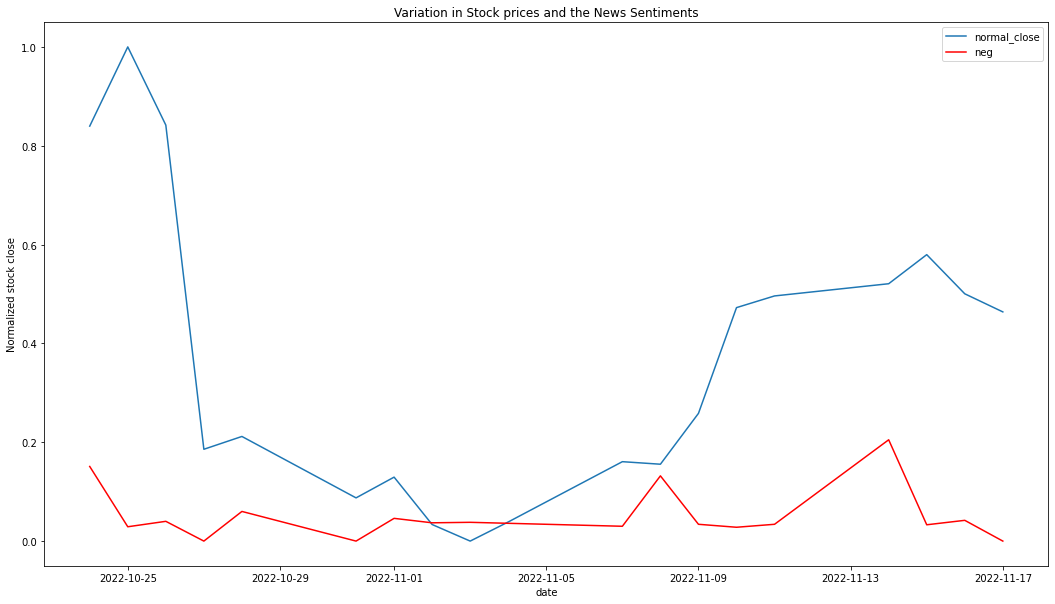

In [129]:
# gca stands for 'get current axis'
ax = plt.gca()
df_merged.plot(kind='line',x='date',y='normal_close',ax=ax, figsize=(18,10))
ax.set_ylabel("Normalized stock close")
df_merged.plot(kind='line',x='date',y='neg', color='red',title='Variation in Stock prices and the News Sentiments', ax=ax, figsize=(18,10))
plt.show()

Calculating Correlation Coedicents to emperically determine the relationship between the variables

In [130]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
# calculate the Pearsons and Spearmans correlation between two variables
# prepare data
data1 = df_merged['neg']  
data2 = df_merged['normal_close'] 
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)
# calculate Spearmans's correlation (non gaussian distribution)
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Pearsons correlation: 0.222
Spearmans correlation: 0.078


Form the Data collected, and the graph drawn above there seem to have some correlation between the negative sentiment of the news and the stock's end of the day close price.



Inspired by-https://github.com/deveshtomar11/News-Sentiment-Analysis-.git